# Load the Data

In [1]:
!pip install -qqq easy-vqa
!pip install -qqq sentence_transformers transformer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 3.2 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement transformer (from versions: none)
ERROR: No matching distribution found for transformer


In [2]:
from easy_vqa import get_train_questions, get_test_questions

train_questions, train_answers, train_image_ids = get_train_questions()
test_questions, test_answers, test_image_ids = get_test_questions()

In [3]:
len(train_questions), len(test_questions)

(38575, 9673)

#Visualize the Data

In [4]:
# Verify the quesion, answers for Images

for idx in range(20):
  print('Question: ', train_questions[idx], end=', ')
  print('Answer: ', train_answers[idx], end=', ')
  print('Image Id: ', train_image_ids[idx])


Question:  what is the blue shape?, Answer:  rectangle, Image Id:  0
Question:  what color is the shape?, Answer:  blue, Image Id:  0
Question:  does the image contain a rectangle?, Answer:  yes, Image Id:  0
Question:  is there a triangle in the image?, Answer:  no, Image Id:  0
Question:  is there a black shape?, Answer:  no, Image Id:  0
Question:  does the image not contain a gray shape?, Answer:  yes, Image Id:  0
Question:  is there a red shape in the image?, Answer:  no, Image Id:  0
Question:  does the image not contain a red shape?, Answer:  yes, Image Id:  0
Question:  is there not a blue shape?, Answer:  no, Image Id:  0
Question:  is there not a blue shape in the image?, Answer:  no, Image Id:  0
Question:  is there not a yellow shape?, Answer:  yes, Image Id:  0
Question:  is a teal shape present?, Answer:  no, Image Id:  0
Question:  what color is the triangle?, Answer:  blue, Image Id:  1
Question:  what color is the shape?, Answer:  blue, Image Id:  1
Question:  is ther

In [5]:
# write a function to display the image

def display_image(image_id):
  from IPython.display import Image
  from PIL import Image
  image_path = f"/usr/local/lib/python3.10/dist-packages/easy_vqa/data/train/images/{image_id}.png"
  display(Image.open(image_path))


In [6]:
# Visualize the data

# Map questions for one particular image
from collections import defaultdict

image_qna_map = defaultdict(list)

for idx in range(len(train_questions)):
  image_qna_map[train_image_ids[idx]].append({'question': train_questions[idx], 'answer': train_answers[idx]})

Image Id:  0


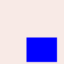

{'question': 'what is the blue shape?', 'answer': 'rectangle'}
{'question': 'what color is the shape?', 'answer': 'blue'}
{'question': 'does the image contain a rectangle?', 'answer': 'yes'}
{'question': 'is there a triangle in the image?', 'answer': 'no'}
{'question': 'is there a black shape?', 'answer': 'no'}
{'question': 'does the image not contain a gray shape?', 'answer': 'yes'}
{'question': 'is there a red shape in the image?', 'answer': 'no'}
{'question': 'does the image not contain a red shape?', 'answer': 'yes'}
{'question': 'is there not a blue shape?', 'answer': 'no'}
{'question': 'is there not a blue shape in the image?', 'answer': 'no'}
{'question': 'is there not a yellow shape?', 'answer': 'yes'}
{'question': 'is a teal shape present?', 'answer': 'no'}
Image Id:  1


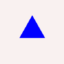

{'question': 'what color is the triangle?', 'answer': 'blue'}
{'question': 'what color is the shape?', 'answer': 'blue'}
{'question': 'is there not a rectangle in the image?', 'answer': 'yes'}
{'question': 'is there a red shape?', 'answer': 'no'}
{'question': 'is there a green shape in the image?', 'answer': 'no'}
{'question': 'is there not a teal shape?', 'answer': 'yes'}
Image Id:  2


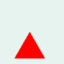

{'question': 'what shape is in the image?', 'answer': 'triangle'}
{'question': 'what shape does the image contain?', 'answer': 'triangle'}
{'question': 'what color is the triangle?', 'answer': 'red'}
{'question': 'what is the color of the triangle?', 'answer': 'red'}
{'question': 'is there a circle?', 'answer': 'no'}
{'question': 'does the image contain a green shape?', 'answer': 'no'}
{'question': 'is there a blue shape in the image?', 'answer': 'no'}
{'question': 'is there a teal shape?', 'answer': 'no'}
{'question': 'is there not a teal shape in the image?', 'answer': 'yes'}
Image Id:  3


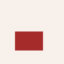

{'question': 'what shape is present?', 'answer': 'rectangle'}
{'question': 'what shape does the image contain?', 'answer': 'rectangle'}
{'question': 'what color is the rectangle?', 'answer': 'brown'}
{'question': 'what is the color of the rectangle?', 'answer': 'brown'}
{'question': 'what is the color of the shape?', 'answer': 'brown'}
{'question': 'does the image not contain a circle?', 'answer': 'yes'}
{'question': 'does the image contain a triangle?', 'answer': 'no'}
{'question': 'does the image contain a gray shape?', 'answer': 'no'}
{'question': 'is there a blue shape?', 'answer': 'no'}
{'question': 'is no yellow shape present?', 'answer': 'yes'}
{'question': 'is there not a brown shape?', 'answer': 'no'}
Image Id:  4


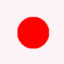

{'question': 'what is the red shape?', 'answer': 'circle'}
{'question': 'what is the color of the circle?', 'answer': 'red'}
{'question': 'what is the color of the shape?', 'answer': 'red'}
{'question': 'is there not a rectangle in the image?', 'answer': 'yes'}
{'question': 'is a circle present?', 'answer': 'yes'}
{'question': 'does the image not contain a circle?', 'answer': 'no'}
{'question': 'is there a black shape?', 'answer': 'no'}
{'question': 'is there not a gray shape?', 'answer': 'yes'}
{'question': 'does the image contain a red shape?', 'answer': 'yes'}
{'question': 'does the image contain a yellow shape?', 'answer': 'no'}
{'question': 'is there not a yellow shape in the image?', 'answer': 'yes'}
{'question': 'is there a teal shape?', 'answer': 'no'}
{'question': 'is there a brown shape in the image?', 'answer': 'no'}
{'question': 'is there not a brown shape in the image?', 'answer': 'yes'}
Image Id:  5


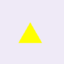

{'question': 'what is the yellow shape?', 'answer': 'triangle'}
{'question': 'what color is the triangle?', 'answer': 'yellow'}
{'question': 'what is the color of the triangle?', 'answer': 'yellow'}
{'question': 'is a rectangle present?', 'answer': 'no'}
{'question': 'is there not a circle?', 'answer': 'yes'}
{'question': 'is there a triangle?', 'answer': 'yes'}
{'question': 'is a green shape present?', 'answer': 'no'}
{'question': 'does the image contain a yellow shape?', 'answer': 'yes'}
{'question': 'is there a brown shape in the image?', 'answer': 'no'}
Image Id:  6


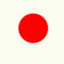

{'question': 'what is the red shape?', 'answer': 'circle'}
{'question': 'what is the color of the circle?', 'answer': 'red'}
{'question': 'what is the color of the shape?', 'answer': 'red'}
{'question': 'is no rectangle present?', 'answer': 'yes'}
{'question': 'does the image contain a circle?', 'answer': 'yes'}
{'question': 'is there not a circle?', 'answer': 'no'}
{'question': 'is there not a triangle in the image?', 'answer': 'yes'}
{'question': 'does the image not contain a gray shape?', 'answer': 'yes'}
{'question': 'is there a green shape?', 'answer': 'no'}
{'question': 'is there a blue shape?', 'answer': 'no'}
{'question': 'is a blue shape present?', 'answer': 'no'}
{'question': 'is a yellow shape present?', 'answer': 'no'}
{'question': 'is no teal shape present?', 'answer': 'yes'}
Image Id:  7


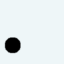

{'question': 'what is the color of the circle?', 'answer': 'black'}
{'question': 'is a rectangle present?', 'answer': 'no'}
{'question': 'is there not a triangle?', 'answer': 'yes'}
{'question': 'is there not a gray shape?', 'answer': 'yes'}
{'question': 'is there not a gray shape in the image?', 'answer': 'yes'}
{'question': 'is there a red shape?', 'answer': 'no'}
{'question': 'is there not a brown shape?', 'answer': 'yes'}
Image Id:  8


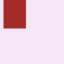

{'question': 'what is the color of the rectangle?', 'answer': 'brown'}
{'question': 'does the image not contain a circle?', 'answer': 'yes'}
{'question': 'is no gray shape present?', 'answer': 'yes'}
{'question': 'does the image contain a red shape?', 'answer': 'no'}
{'question': 'is no red shape present?', 'answer': 'yes'}
{'question': 'does the image not contain a green shape?', 'answer': 'yes'}
{'question': 'is there a blue shape in the image?', 'answer': 'no'}
{'question': 'does the image not contain a blue shape?', 'answer': 'yes'}
{'question': 'is there a teal shape in the image?', 'answer': 'no'}
{'question': 'is there a brown shape in the image?', 'answer': 'yes'}
Image Id:  9


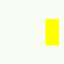

{'question': 'what shape is in the image?', 'answer': 'rectangle'}
{'question': 'what is the yellow shape?', 'answer': 'rectangle'}
{'question': 'what is the color of the rectangle?', 'answer': 'yellow'}
{'question': 'what color is the shape?', 'answer': 'yellow'}
{'question': 'is there a rectangle?', 'answer': 'yes'}
{'question': 'is a gray shape present?', 'answer': 'no'}
{'question': 'is a red shape present?', 'answer': 'no'}
{'question': 'is no red shape present?', 'answer': 'yes'}
{'question': 'does the image not contain a blue shape?', 'answer': 'yes'}
{'question': 'is there a brown shape?', 'answer': 'no'}
{'question': 'does the image not contain a brown shape?', 'answer': 'yes'}


In [7]:
# Display Image and question-answers
for idx in range(10):
  print('Image Id: ', idx)
  display_image(idx)
  for qna in image_qna_map[idx]:
    print(qna)


In [8]:
# Find all the possible answers

from easy_vqa import get_answers

all_answers = get_answers()
all_answers

['circle',
 'green',
 'red',
 'gray',
 'yes',
 'teal',
 'black',
 'rectangle',
 'yellow',
 'triangle',
 'brown',
 'blue',
 'no']

In [9]:
# Get index mapping for the answer labels
label2Index = {label: idx for idx, label in enumerate(all_answers)}
label2Index

{'circle': 0,
 'green': 1,
 'red': 2,
 'gray': 3,
 'yes': 4,
 'teal': 5,
 'black': 6,
 'rectangle': 7,
 'yellow': 8,
 'triangle': 9,
 'brown': 10,
 'blue': 11,
 'no': 12}

In [10]:
# Get Label to Index mapping for the answer labels
index2Label = {idx: label for label, idx in label2Index.items()}
index2Label

{0: 'circle',
 1: 'green',
 2: 'red',
 3: 'gray',
 4: 'yes',
 5: 'teal',
 6: 'black',
 7: 'rectangle',
 8: 'yellow',
 9: 'triangle',
 10: 'brown',
 11: 'blue',
 12: 'no'}

# Preprocess the Data

In [11]:
# Generate a Train dataframe

import pandas as pd

image_paths = [f"/usr/local/lib/python3.10/dist-packages/easy_vqa/data/train/images/{image_id}.png" for image_id in train_image_ids]
train_answer_labels = [label2Index[answer] for answer in train_answers]

train_df = pd.DataFrame({'question': train_questions, 'answer': train_answer_labels, 'image_path': image_paths})
train_df.head()

,question,answer,image_path
0,what is the blue shape?,7,/usr/local/lib/python3.10/dist-packages/easy_v...
1,what color is the shape?,11,/usr/local/lib/python3.10/dist-packages/easy_v...
2,does the image contain a rectangle?,4,/usr/local/lib/python3.10/dist-packages/easy_v...
3,is there a triangle in the image?,12,/usr/local/lib/python3.10/dist-packages/easy_v...
4,is there a black shape?,12,/usr/local/lib/python3.10/dist-packages/easy_v...


In [12]:
# Generate a Test dataframe

import pandas as pd

image_paths = [f"/usr/local/lib/python3.10/dist-packages/easy_vqa/data/test/images/{image_id}.png" for image_id in test_image_ids]
test_answer_labels = [label2Index[answer] for answer in test_answers]

test_df = pd.DataFrame({'question': test_questions, 'answer': test_answer_labels, 'image_path': image_paths})
test_df.head()

,question,answer,image_path
0,what is the red shape?,9,/usr/local/lib/python3.10/dist-packages/easy_v...
1,what is the color of the triangle?,2,/usr/local/lib/python3.10/dist-packages/easy_v...
2,what is the color of the shape?,2,/usr/local/lib/python3.10/dist-packages/easy_v...
3,does the image contain a circle?,12,/usr/local/lib/python3.10/dist-packages/easy_v...
4,is there not a black shape in the image?,4,/usr/local/lib/python3.10/dist-packages/easy_v...


In [13]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [14]:
train_image_dir = "/usr/local/lib/python3.10/dist-packages/easy_vqa/data/train/images"

image_map = dict()

IMAGE_SHAPE = (64, 64)
BATCH_SIZE = 32

def load_image(image_path):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, IMAGE_SHAPE)
  image = tf.cast(image, tf.float32) / 255.0
  return image

train_images = []

for image_id in train_image_ids:
  if image_id not in image_map:
    image_path = os.path.join(train_image_dir, f"{image_id}.png")
    image = load_image(image_path)
    image_map[image_id] = image

  # Appending the arrays
  train_images.append(image_map[image_id]) # appending image array

train_images = np.array(train_images)
train_images.shape

(38575, 64, 64, 3)

In [16]:
test_image_dir = "/usr/local/lib/python3.10/dist-packages/easy_vqa/data/test/images"

test_image_map = dict()

test_images = []

for image_id in test_image_ids:
  if image_id not in test_image_map:
    image_path = os.path.join(test_image_dir, f"{image_id}.png")
    image = load_image(image_path)
    test_image_map[image_id] = image

  # Appending the arrays
  test_images.append(test_image_map[image_id]) # appending image array

test_images = np.array(test_images)
test_images.shape

(9673, 64, 64, 3)

In [17]:
train_questions = list(train_df['question'].values)

train_questions[:10]

['what is the blue shape?',
 'what color is the shape?',
 'does the image contain a rectangle?',
 'is there a triangle in the image?',
 'is there a black shape?',
 'does the image not contain a gray shape?',
 'is there a red shape in the image?',
 'does the image not contain a red shape?',
 'is there not a blue shape?',
 'is there not a blue shape in the image?']

In [18]:
train_output_labels = train_df['answer'].values

train_output_labels.shape

(38575,)

In [19]:
train_output_labels[:10], list(map(lambda x: index2Label[x], train_output_labels))[:10]

(array([ 7, 11,  4, 12, 12,  4, 12,  4, 12, 12]),
 ['rectangle', 'blue', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no'])

In [20]:
test_questions = list(test_df['question'].values)

test_questions[:10]

['what is the red shape?',
 'what is the color of the triangle?',
 'what is the color of the shape?',
 'does the image contain a circle?',
 'is there not a black shape in the image?',
 'does the image contain a green shape?',
 'is a green shape present?',
 'is there a blue shape in the image?',
 'is no blue shape present?',
 'is a yellow shape present?']

In [21]:
test_output_labels = test_df['answer'].values

test_output_labels.shape

(9673,)

# A simple Model

In [29]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Embedding, LSTM, Add, Dot
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [23]:
# Example data
num_samples = 5000
max_text_length = 30
vocab_size = 2000
embedding_dim = 50
image_shape = (64, 64, 3)
num_output_labels = 13

# Image data
image_data = train_images[:num_samples]
validation_image_data = train_images[num_samples: num_samples+1000]

# Text data
question_text_data = train_questions[:num_samples]
validation_question_data = train_questions[num_samples: num_samples+1000]

In [24]:
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(question_text_data)
sequences = tokenizer.texts_to_sequences(question_text_data)
question_data_padded = pad_sequences(sequences, maxlen=max_text_length)

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(validation_question_data)
sequences = tokenizer.texts_to_sequences(validation_question_data)
val_question_data_padded = pad_sequences(sequences, maxlen=max_text_length)

validation_labels = train_output_labels[num_samples: num_samples+1000]

In [39]:
# Image input
image_input = Input(shape=image_shape, name='image_input')
x = Conv2D(32, (3, 3), activation='relu', name='image_conv1')(image_input)
x = Conv2D(64, (3, 3), activation='relu', name='image_conv2')(x)
x = MaxPooling2D(pool_size=(2, 2), strides=None, padding='same')(x)
x = Flatten()(x)
x = Dense(64, activation='relu', name='image_dense')(x)


# Text input
text_input = Input(shape=(max_text_length,), dtype='int32', name='text_input')
text_features = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_text_length)(text_input)
y = LSTM(128)(text_features)
y = Dense(128, activation='relu', name='text_dense1')(y)
y = Dense(64, activation='relu', name='text_dense2')(y)


# Concatenate features
combined_features = Add()([x, y])

# Add dense layers for final classification
z = Dense(32, activation='relu')(combined_features)
output = Dense(num_output_labels, activation='softmax')(z)

# Create the model
model = Model(inputs=[image_input, text_input], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 image_input (InputLayer)    [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 image_conv1 (Conv2D)        (None, 62, 62, 32)           896       ['image_input[0][0]']         
                                                                                                  
 text_input (InputLayer)     [(None, 30)]                 0         []                            
                                                                                                  
 image_conv2 (Conv2D)        (None, 60, 60, 64)           18496     ['image_conv1[0][0]']         
                                                                                            

In [42]:

# Generate dummy labels for training
labels = train_output_labels[:num_samples]

# Early Stopping callback
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# Train the model
history = model.fit([image_data, question_data_padded], labels, validation_data=([validation_image_data, val_question_data_padded],validation_labels), epochs=10, batch_size=32)


Epoch 1/10
157/157 [==============================] - 3s 16ms/step - loss: 0.5097 - accuracy: 0.7972 - val_loss: 2.3033 - val_accuracy: 0.3910
Epoch 2/10
157/157 [==============================] - 2s 13ms/step - loss: 0.4538 - accuracy: 0.8208 - val_loss: 2.1555 - val_accuracy: 0.5430
Epoch 3/10
157/157 [==============================] - 2s 12ms/step - loss: 0.4136 - accuracy: 0.8332 - val_loss: 2.0388 - val_accuracy: 0.5410
Epoch 4/10
157/157 [==============================] - 2s 13ms/step - loss: 0.3775 - accuracy: 0.8500 - val_loss: 2.2336 - val_accuracy: 0.5050
Epoch 5/10
157/157 [==============================] - 2s 13ms/step - loss: 0.3579 - accuracy: 0.8576 - val_loss: 2.4253 - val_accuracy: 0.5760
Epoch 6/10
157/157 [==============================] - 2s 15ms/step - loss: 0.3462 - accuracy: 0.8594 - val_loss: 2.4172 - val_accuracy: 0.5760
Epoch 7/10
157/157 [==============================] - 3s 17ms/step - loss: 0.3285 - accuracy: 0.8648 - val_loss: 2.5352 - val_accuracy: 0.5530

# Inference

In [43]:
tokenizer = Tokenizer(num_words=vocab_size)
tokenized_text = tokenizer.fit_on_texts(test_questions)
sequences = tokenizer.texts_to_sequences(test_questions)
test_data_padded = pad_sequences(sequences, maxlen=max_text_length)

result = model.predict([test_images, test_data_padded])

303/303 [==============================] - 2s 4ms/step


In [44]:
# Apply argmax to get the predicted class
predictions = np.argmax(result, axis=-1)

print(f"For {predictions.shape} test examples, Predicted Class: {predictions}")


For (9673,) test examples, Predicted Class: [ 0  3  3 ... 12 12  4]


In [45]:
(predictions.shape)


(9673,)

In [ ]:
np.array(test_answer_labels).shape

(9673,)

In [46]:
# Example true labels
true_labels = np.array(test_answer_labels) # Assuming one-hot encoded labels for 3 classes

# Calculate loss
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
loss = loss_fn(true_labels, result).numpy()
print("Loss:", loss)

# Calculate accuracy
accuracy_fn = tf.keras.metrics.SparseCategoricalAccuracy()
accuracy_fn.update_state(true_labels, result)
accuracy = accuracy_fn.result().numpy()
print("Accuracy:", accuracy)

Loss: 0.8206773
Accuracy: 0.7465109


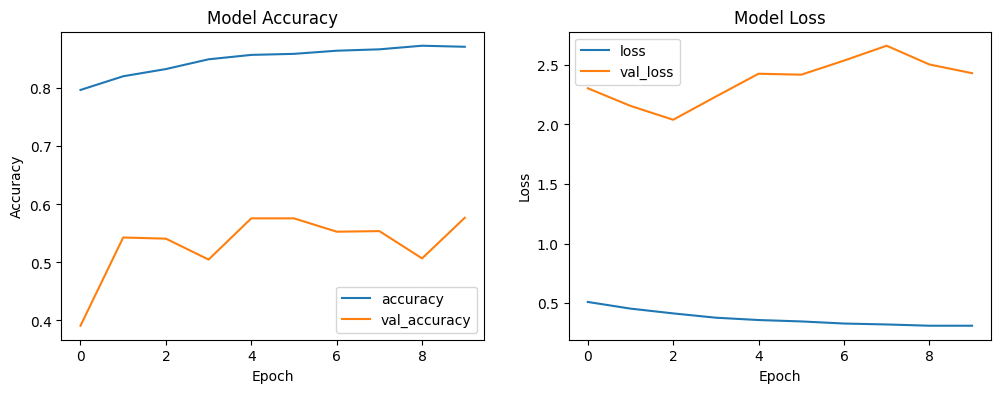

In [47]:
# Plot accuracy and loss

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.show()